In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
x = np.random.uniform(-10, 10, (1000,1))
y = np.random.uniform(-10, 10, (1000,1))
inputs = np.column_stack((x, y))
inputs.shape

(1000, 2)

In [16]:
noise = np.random.uniform(-1, 1, (1000,1))
targets = 2*x - 3*y + 5 + noise
targets.shape

(1000, 1)

In [20]:
np.savez('TF_Minimal_Example_Data', inputs=inputs, targets=targets)

In [22]:
data = np.load('./TF_Minimal_Example_Data.npz')

In [34]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(data['inputs'], data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.8970    
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2553 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8082 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8033 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4637 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3815 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3902 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3554 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3566 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3560 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3524 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3410 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3587 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3532 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [36]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.019638 ],
       [-2.9821544]], dtype=float32)

In [38]:
bias = model.layers[0].get_weights()[1]
bias

array([5.01771], dtype=float32)

In [42]:
prediction = model.predict_on_batch(data['inputs'])

In [46]:
prediction.shape

(1000, 1)

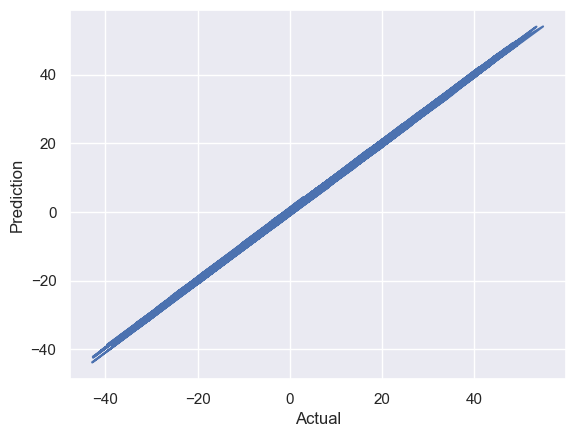

In [49]:
plt.plot(data['targets'], prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()